In [13]:
def chrome_test_cache(n=100, backend="wasm", task="vision"):
    option = webdriver.ChromeOptions()
    option.page_load_strategy = "normal"
    option.add_argument("user-data-dir=./custom_profile")
    driver = webdriver.Chrome(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data

def chrome_test_default_cache(n=100, backend="wasm", task="vision", others=default_option):
    option = webdriver.ChromeOptions()
    option.page_load_strategy = "normal"
    driver = webdriver.Chrome(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data

In [14]:
time_cache = chrome_test_cache()
time_default = chrome_test_default_cache()
print(time_cache)
print(time_default)


[191, 211, 168, 195, 192, 254, 160, 212, 203, 231, 213, 206, 177, 327, 166, 261, 173, 154, 162, 177, 225, 207, 213, 200, 204, 280, 216, 288, 234, 231, 191, 390, 220, 167, 165, 211, 192, 167, 165, 202, 544, 345, 414, 333, 287, 312, 493, 312, 253, 232, 263, 513, 402, 213, 208, 221, 200, 193, 219, 180, 228, 223, 609, 467, 333, 190, 216, 178, 169, 197, 219, 183, 178, 175, 163, 176, 442, 198, 167, 189, 201, 162, 193, 174, 166, 190, 173, 169, 181, 175, 208, 186, 198, 185, 179, 183, 186, 175, 154, 162]
[262, 232, 319, 338, 241, 181, 180, 356, 185, 155, 159, 188, 196, 178, 181, 186, 182, 161, 164, 174, 168, 156, 201, 197, 172, 165, 163, 174, 181, 164, 167, 165, 248, 220, 182, 185, 179, 152, 152, 152, 153, 150, 148, 150, 152, 148, 153, 175, 172, 157, 151, 155, 153, 153, 157, 157, 151, 168, 152, 163, 166, 151, 190, 209, 175, 149, 147, 154, 170, 154, 158, 174, 155, 155, 184, 198, 170, 161, 151, 155, 153, 150, 154, 163, 154, 149, 150, 153, 152, 149, 150, 154, 155, 187, 198, 178, 174, 171, 237, 505

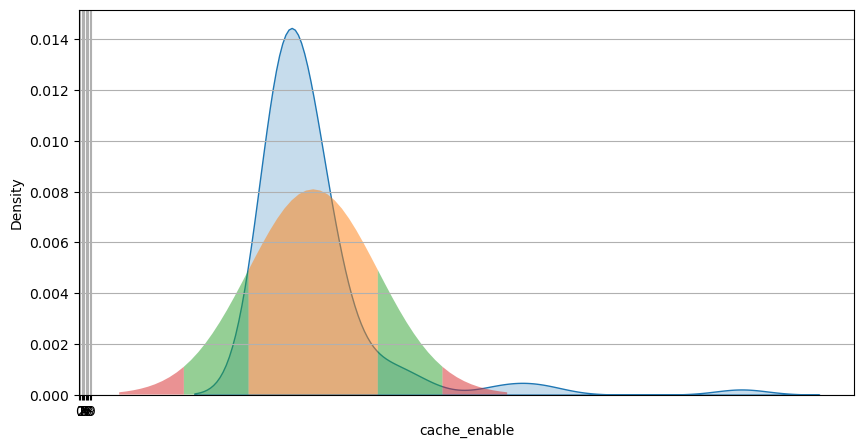

In [26]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

X = time_default

mean = np.mean(X)
var = np.var(X)
std = np.std(X)

plt.figure(figsize=(10, 5))

ax = sns.kdeplot(X, fill=True)

N = 10
for i in [1, 2, 3]:
    x1 = np.linspace(mean - i*std, mean - (i - 1)*std, N)
    x2 = np.linspace(mean - (i - 1)*std, mean + (i - 1)*std, N)
    x3 = np.linspace(mean + (i - 1)*std, mean + i*std, N)
    x = np.concatenate((x1, x2, x3))
    x = np.where((mean - (i - 1)*std < x) & (x < mean + (i - 1)*std), np.nan, x)
    y = norm.pdf(x, mean, std)
    ax.fill_between(x, y, alpha=0.5)

plt.xlabel("cache_enable")
# plt.ylabel("Probability Density Function")
plt.xticks(ticks=range(0, 10))
plt.grid()

plt.show()

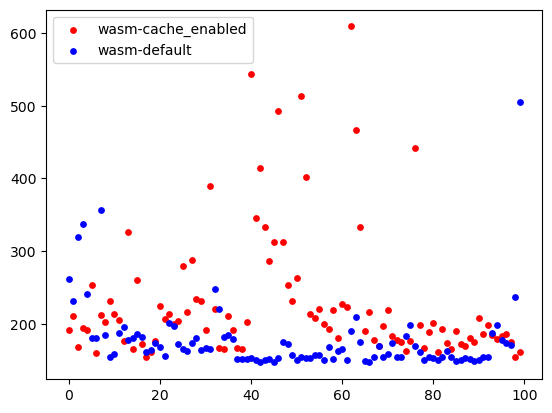

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(range(len(time_cache)), time_cache, s=15, c = "r", label="wasm-cache_enabled")
plt.scatter(range(len(time_default)), time_default, s=15, c = "b", label="wasm-default")
plt.legend()
plt.show()
